МІНІСТЕРСТВО ОСВІТИ І НАУКИ, МОЛОДІ ТА СПОРТУ УКРАЇНИ
НАЦІОНАЛЬНИЙ ТЕХНІЧНИЙ УНІВЕРСИТЕТ УКРАЇНИ
«КИЇВСЬКИЙ ПОЛІТИХНІЧНИЙ ІНСТИТУТ ІМ.ІГОРЯ СІКОРСЬКОГО»
ФІЗИКО-ТЕХНІЧНИЙ ІНСТИТУТ


Лабораторна робота №3
«Побудова фракталів з використанням L-систем»
Варіант 9





Виконав:                                                                     Студент 2 курсу
     Групи ФІ-21
Климентьєв Максим




Київ 2024

In [37]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import time
import numpy as np

In [38]:
class Fractal:
    def __init__(self, set_of_parameters, iter=1, size=1000, standart_typ=True, multiplayer=1, name=None):
        # print(set_of_parameters)
        self.standart_typ = standart_typ
        self.size = size
        # self.cycles = 1
        self.xy = np.array(
            [[0.0, 0.0]]*self.size
            )
        if self.standart_typ:
            if len(set_of_parameters) == 7:
                self.a, self.b, self.c, self.d, self.e, self.f, self.p = set_of_parameters
            else:
                self.a, self.b, self.c, self.d, self.e, self.f = set_of_parameters
                self.p = [1/self.a.__len__()] * self.a.__len__()
        else:
            if len(set_of_parameters) == 7:
                self.r, self.s, self.t, self.fi, self.e, self.f, self.p = set_of_parameters
            else:
                self.r, self.s, self.t, self.fi, self.e, self.f = set_of_parameters
                self.p = [1/self.r.__len__()] * self.r.__len__()
        self.set_size = len(self.p)
        self.create_data_for_fractal(iter)
        self.plot_fractal(multiplayer, name)
    
    def create_data_for_fractal(self, iterations=1):
        # variant = np.random.choice(self.set_size, 1, p=self.p)
        # variant = variant[0]
        if self.standart_typ:
            for iteration in range(iterations):
                # self.xy[0] = [1, 1]
                # print(i, self.size*self.cycles)
                # while i < self.size-1:
                for i in range(self.size-1):
                    variant = np.random.choice(self.set_size, 1, p=self.p)
                    variant = variant[0]
                    xk = self.a[variant]*self.xy[i, 0] + self.b[variant]*self.xy[i, 1] + self.e[variant]
                    yk = self.c[variant]*self.xy[i, 0] + self.d[variant]*self.xy[i, 1] + self.f[variant]
                    self.xy[i+1] = [xk, yk]
                    i += 1
        else:
            for iteration in range(iterations):
                for i in range(self.size-1):
                    variant = np.random.choice(self.set_size, 1, p=self.p)
                    variant = variant[0]
                    xk = self.r[variant]*np.cos(self.t[variant])*self.xy[i, 0] - self.s[variant]*np.sin(self.fi[variant])*self.xy[i, 1] + self.e[variant]
                    yk = self.r[variant]*np.sin(self.t[variant])*self.xy[i, 0] + self.s[variant]*np.cos(self.fi[variant])*self.xy[i, 1] + self.f[variant]
                    self.xy[i+1] = [xk, yk]
                    i += 1
                # print(i, self.size*self.cycles)
            # self.cycles += 1
            # print(self.xy)

    def plot_fractal(self, multiplayer=1, name=None):
        fig, ax = plt.subplots()
        ax.scatter(self.xy[:, 0], self.xy[:, 1], s=1)
        def update(frame):
            frame = frame * multiplayer
            ax.clear()
            # print(self.xy[:frame])
            x, y = self.xy[:frame, :1], self.xy[:frame, 1:]
            ax.scatter(x, y, s=1)
            ax.set_title(f'procent={frame/(self.size)*100}%')
        
        ani = animation.FuncAnimation(fig=fig, func=update, frames=self.size//multiplayer, interval=30)
        if name is None:
            ani.save(str(time.localtime().tm_hour)+str(time.localtime().tm_min)+str(time.localtime().tm_sec)+'.gif', writer=animation.PillowWriter(fps=30) )
        else:
            ani.save(str(name) + '.gif', writer=animation.PillowWriter(fps=30) )
        # plt.scatter()3
        plt.show()

1.4.1. Кленовий лист

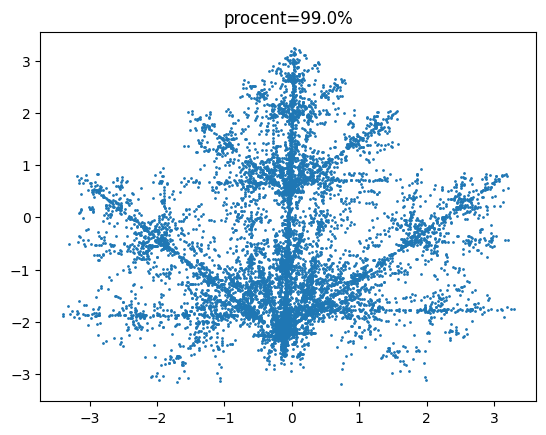

In [39]:
klen_list = Fractal([
    [0.1400, 0.4300, 0.4500, 0.4900],
    [0.0100, 0.5200, -0.4900, 0.0000],
    [0.0000, -0.4500, 0.4700, 0.0000],
    [0.5100, 0.5000, 0.4700, 0.5100],
    [-0.0800, 1.4900, -1.6200, 0.0200],
    [-1.3100, -0.7500, -0.7400, 1.6200],
], 5, 10**4, multiplayer=100, name='klen_list')

![klen_list.gif](./lab2/klen_list.gif)

Для меншього писання тексту

In [40]:
def redo_row(row):
    # 0,787879 -0,121212 0,181818
    for i in range(len(row)):
        if row[i] == ',':
            row = row[:i] + '.' + row[i+1:]
    row = row.split()
    row = [float(i) for i in row]
    return row

1.4.2. Спіраль

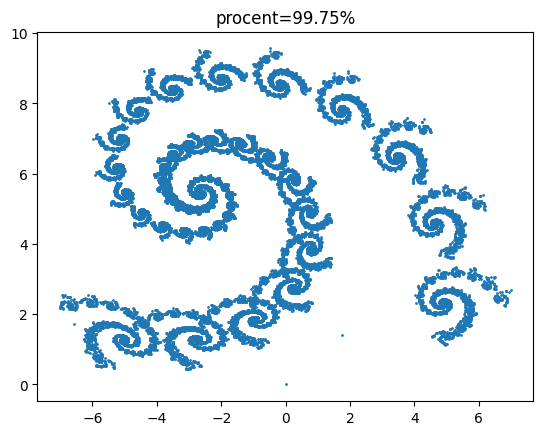

In [41]:
spiral = Fractal([
    redo_row("0,787879 -0,121212 0,181818"),
    redo_row("-0,424242 0,257576 -0,136364"),
    redo_row("0,242424 0,151515 0,090909"),
    redo_row("0,859848 0,053030 0,181818"),
    redo_row("1,758647 -6,721654 6,086107"),
    redo_row("1,408065 1,377236 1,568035"),
    redo_row("0,90 0,05 0,05")
], 4, 10**4*4, multiplayer=100, name='spiral')

![spiral.gif](./lab2/spiral.gif)

1.4.3. Mandelbrot-like

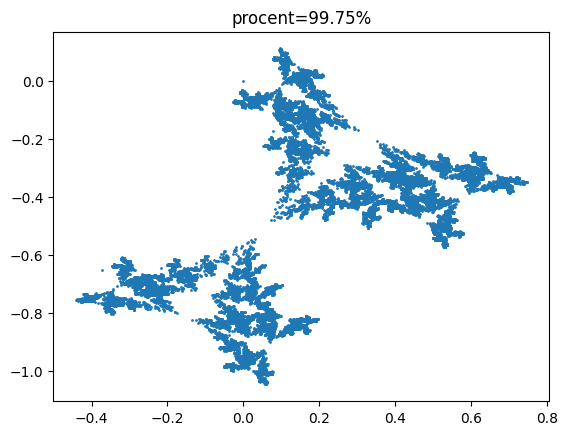

In [42]:
mandelbrot = Fractal([
    redo_row("0,2020 0,1380"),
    redo_row("-0,8050 0,6650"),
    redo_row("-0,6890 -0,5020"),
    redo_row("-0,3420 -0,2220"),
    redo_row("-0,3730 0,6600"),
    redo_row("-0,6530 -0,2770")
], 4, 10**4*4, multiplayer=100, name='mandelbrot')

![mandelbrot.gif](./lab2/mandelbrot.gif)

1.4.4. Фрактальне дерево

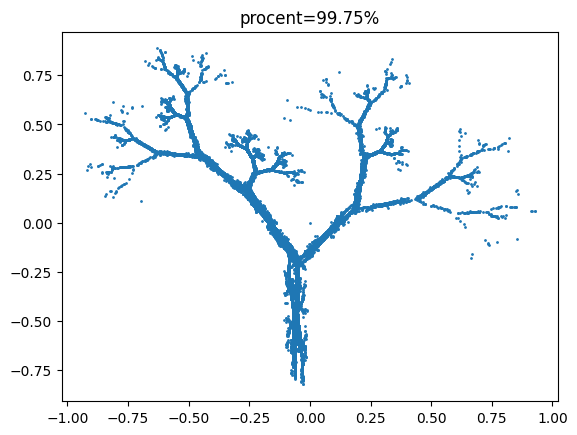

In [43]:
fractal_tree = Fractal([
    redo_row("0,0500 -0,0500 0,0300 -0,0300 0,5600 0,1900 -0,3300"),
    redo_row("0,0000 0,0000 -0,1400 0,1400 0,4400 0,0700 -0,3400"),
    redo_row("0,0000 0,0000 0,0000 0,0000 -0,3700 -0,1000 -0,3300"),
    redo_row("0,4000 -0,4000 0,2600 -0,2600 0,5100 0,1500 0,3400"),
    redo_row("-0,0600 -0,0600 -0,1600 -0,1600 0,3000 -0,2000 -0,5400"),
    redo_row("-0,4700 -0,4700 -0,0100 -0,0100 0,1500 0,2800 0,3900"),
], 3, 10**4*4, multiplayer=100, name='fractal_tree')

![fractal_tree.gif](./lab2/fractal_tree.gif)

1.4.5. Другий варіант фрактального дерева

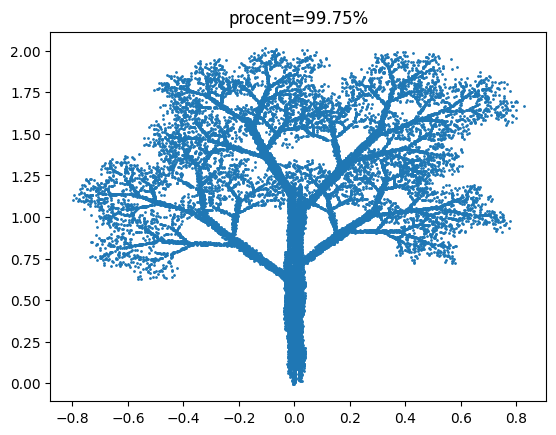

In [44]:
fractal_tree_2 = Fractal([
    redo_row("0,0500 0,0500 0,6000 0,5000 0,5000 0,5500"),
    redo_row("0,6000 -0,5000 0,5000 0,4500 0,5500 0,4000"),
    redo_row("0,0000 0,0000 0,6980 0,3490 -0,5240 -0,6980"),
    redo_row("0,0000 0,0000 0,6980 0,3492 -0,5240 -0,6980"),
    redo_row("0,0000 0,0000 0,0000 0,0000 0,0000 0,0000"),
    redo_row("0,0000 1,0000 0,6000 1,1000 1,0000 0,7000")
], 3, 10**4*4, False, multiplayer=100, name='fractal_tree_2')

![fractal_tree_2.gif](./lab2/fractal_tree_2.gif)

1.4.6. Третій варіант фрактального дерева

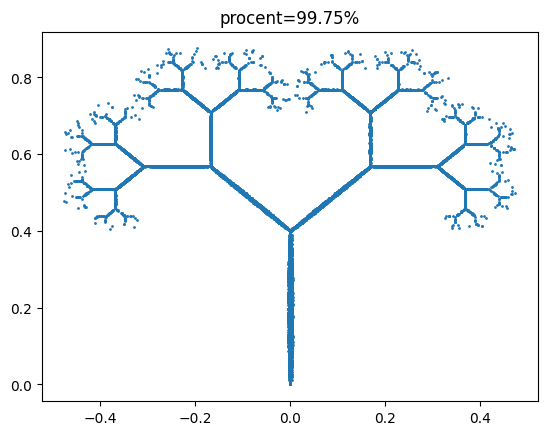

In [45]:
fractal_tree_3 = Fractal([
    redo_row("0,0100 -0,0100 0,4200 0,4200"),
    redo_row("0,0000 0,0000 -0,4200 0,4200"),
    redo_row("0,0000 0,0000 0,4200 -0,4200"),
    redo_row("0,4500 -0,4500 0,4200 0,4200"),
    redo_row("0,0000 0,0000 0,0000 0,0000"),
    redo_row("0,0000 0,4000 0,4000 0,4000"),
], 12, 10**4*4, multiplayer=100, name='fractal_tree_3')

![fractal_tree_3.gif](./lab2/fractal_tree_3.gif)

1.4.7. Четвертий варіант фрактального дерева

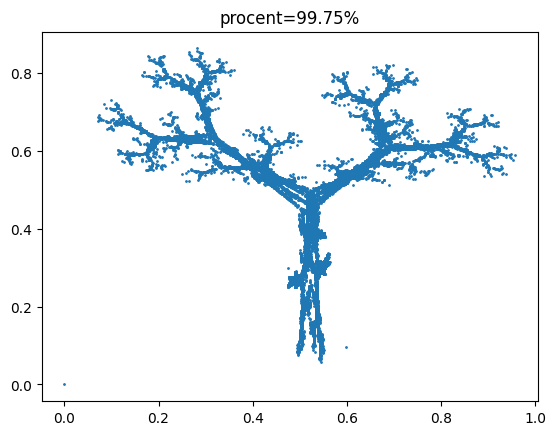

In [46]:
fractal_tree_4 = Fractal([
    redo_row("0,1950 0,4620 -0,6370 -0,0350 -0,0580"),
    redo_row("-0,4880 0,4140 0,0000 0,0700 -0,0700"),
    redo_row("0,3440 -0,2520 0,0000 -0,4690 0,4530"),
    redo_row("0,4430 0,3610 0,5010 0,0220 -0,1110"),
    redo_row("0,4431 0,2511 0,8562 0,4884 0,5976"),
    redo_row("0,2452 0,5692 0,2512 0,5069 0,0969"),
    redo_row("0,2 0,2 0,2 0,2 0,2")
], 13, 10**4*4, multiplayer=100, name='fractal_tree_4')

![fractal_tree_4.gif](./lab2/fractal_tree_4.gif)

1.4.8. Фрактальний лист

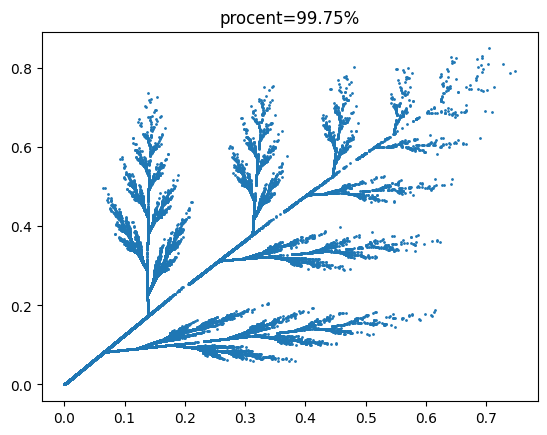

In [47]:
fractal_leaf = Fractal([
    redo_row("0,0000 0,7248 0,1583 0,3386"),
    redo_row("0,2439 0,0337 -0,1297 0,3694"),
    redo_row("0,0000 -0,0253 0,3550 0,2227"),
    redo_row("0,3053 0,7426 0,3676 -0,0756"),
    redo_row("0,0000 0,2060 0,1383 0,0679"),
    redo_row("0,0000 0,2538 0,1750 0,0826")
], 3, 10**4*4, multiplayer=100, name='fractal_leaf')

![fractal_leaf.gif](./lab2/fractal_leaf.gif)

1.4.9. Фрактал пісочний долар-сніжинка

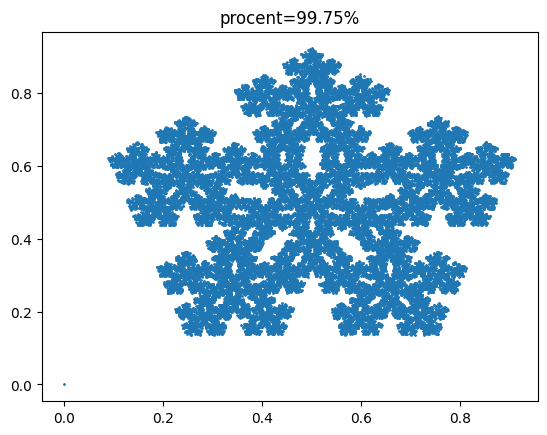

In [48]:
fractal_sand_dollar_snow = Fractal([
    redo_row("0,38200 0,11800 0,11800 -0,30900 -0,30900 0,38200"),
    redo_row("0,00000 -0,36330 0,36330 -0,22450 0,22450 0,00000"),
    redo_row("0,00000 0,36330 -0,36330 0,22450 -0,22450 0,00000"),
    redo_row("0,38200 0,11800 0,11800 -0,30900 -0,30900 -0,38200"),
    redo_row("0,30900 0,36330 0,51870 0,60700 0,70160 0,30900"),
    redo_row("0,57000 0,33060 0,69400 0,30900 0,53350 0,67700")
], 3, 10**4*4, multiplayer=100, name='fractal_sand_dollar_snow')

![fractal_sand_dollar_snow.gif](./lab2/fractal_sand_dollar_snow.gif)

1.4.10. Фрактал папороті

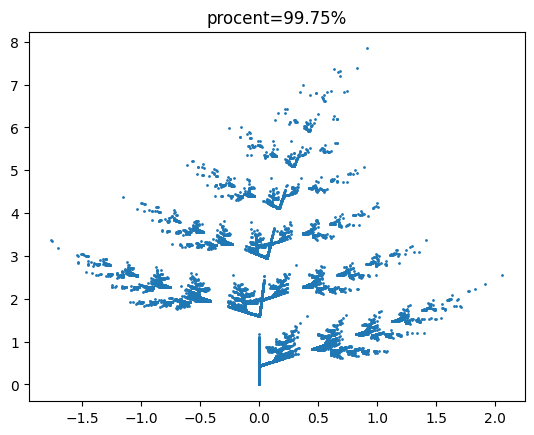

In [49]:
fractal_paporot = Fractal([
    redo_row("0,0 0,2 -0,15 0,75"),
    redo_row("0,0 -0,26 0,28 0,04"),
    redo_row("0,0 0,23 0,26 -0,04"),
    redo_row("0,16 0,22 0,24 0,85"),
    redo_row("0,0 0,0 0,0 0,0"),
    redo_row("0,0 1.6 0,44 1.6")
], 3, 10**4*4, multiplayer=100, name='fractal_paporot')

![fractal_paporot.gif](./lab2/fractal_paporot.gif)

1.5. Приклад інших фракталів

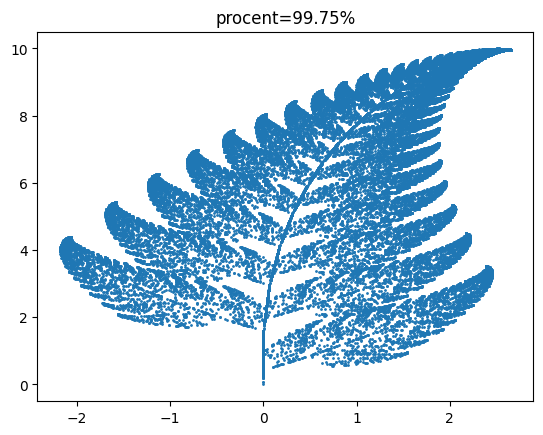

In [50]:
fractal_priklad = Fractal([
    redo_row("0,0 0,2 -0,15 0,85"),
    redo_row("0,0 -0,26 0,28 0,04"),
    redo_row("0,0 0,23 0,26 -0,04"),
    redo_row("0,16 0,22 0,24 0,85"),
    redo_row("0,0 0,0 0,0 0,0"),
    redo_row("0,0 1,6 0,44 1,6"),
    redo_row("0,01 0,07 0,07 0,85")
], 3, 10**4*4, multiplayer=100, name='fractal_priklad')

![fractal_priklad.gif](./lab2/fractal_priklad.gif)

1.5.1. IFS Chaos Text

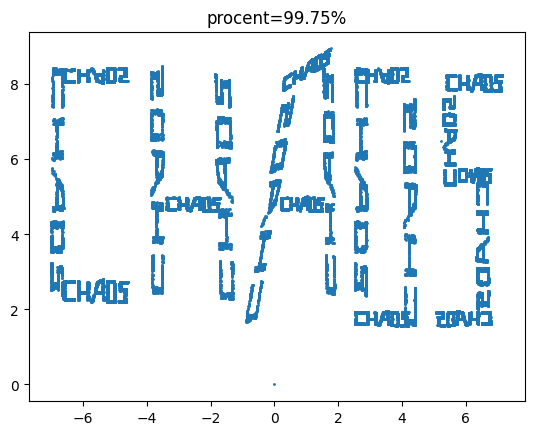

In [51]:
ifs_chaos_text = Fractal([
    redo_row("0 0,143 0,143 0 0,119 -0,0123806 0,0852291 0,104432 -0,00814186 0,093 0 0,119 0,119 0 0,123998 0 0,071 0 -0,121"),
    redo_row("0,053 0 0 0,053 0 -0,0649723 0,0506328 0,00529117 -0,0417935 0 0,053 0 0 0,053 -0,00183957 0,053 0 -0,053 0"),
    redo_row("-0,429 0 0 0,429 0 0,423819 0,420449 0,0570516 0,423922 0 -0,429 0 0 0,429 0,000691208 0,167 0 -0,238 0"),
    redo_row("0 -0,053 0,083 0 0,053 0,00189797 0,0156626 0,0527352 0,00415972 0,053 0 -0,053 0,053 0 0,0629731 0 0,053 0 0,053"),
    redo_row("-7,083 -5,619 -5,619 -3,952 -2,555 -1,226 -0,421 0,976 1,934 0,861 2,447 3,363 3,363 3,972 6,275 5,215 6,279 6,805 5,941"),
    redo_row("5,43 8,513 2,057 5,43 4,536 5,235 4,569 8,113 5,37 4,536 5,43 8,513 1,487 4,569 7,716 6,483 5,298 3,714 1,487")
], 3, 10**4*4, multiplayer=100, name='chaos_text')

![chaos_text.gif](./lab2/chaos_text.gif)

1.5.2. IFS Dragon

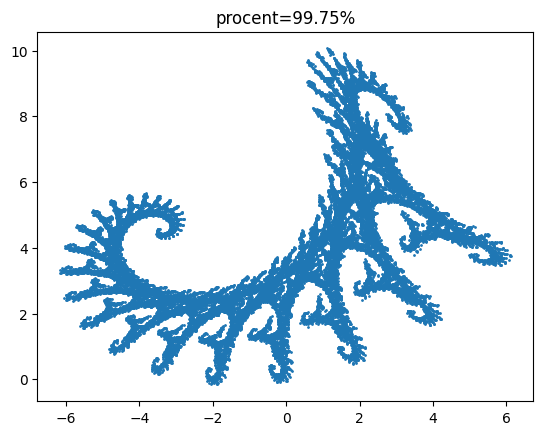

In [52]:
ifs_dragon = Fractal([
    redo_row("0,824074 0,088272"),
    redo_row("0,281428 0,520988"),
    redo_row("-0,212346 -0,463889"),
    redo_row("0,864198 -0,377778"),
    redo_row("-1,882290 0,785360"),
    redo_row("-0,110607 8,095795"),
    redo_row("0,8 0,2")
], 3, 10**4*4, multiplayer=100, name='dragon')

![dragon.gif](./lab2/dragon.gif)

1.5.3. IFS Гілка

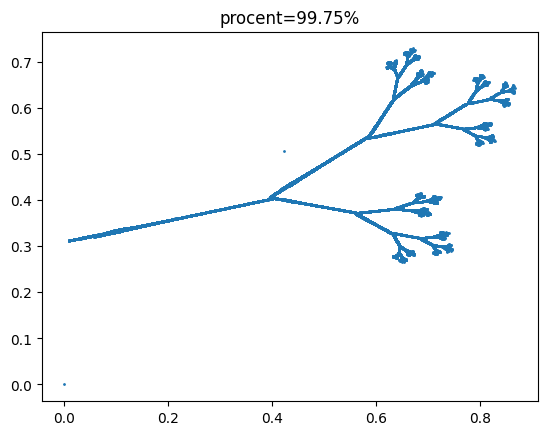

In [53]:
ifs_branch = Fractal([
    redo_row("0,387 0,441 -0,468"),
    redo_row("0,430 -0,091 0,020"),
    redo_row("0,430 -0,009 -0,113"),
    redo_row("-0,387 -0,322 0,015"),
    redo_row("0,2560 0,4219 0,4"),
    redo_row("0,5220 0,5059 0,4"),
    [1/3, 1/3, 1/3]
], 3, 10**4*4, multiplayer=100, name='branch')

![branch.gif](./lab2/branch.gif)

1.5.4. IFS Ялинка

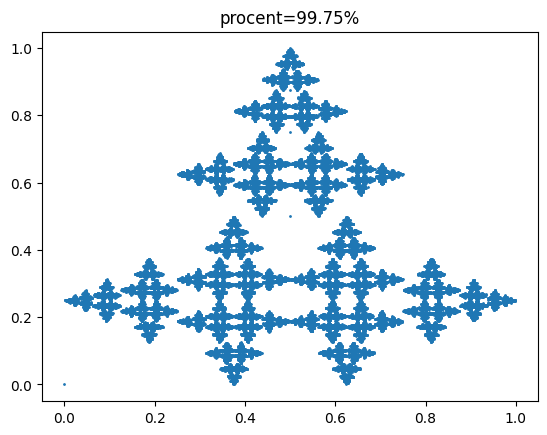

In [54]:
ifs_tree = Fractal([
    redo_row("0,0 0,0 0,5"),
    redo_row("-0,5 0,5 0,0"),
    redo_row("0,5 -0,5 0,0"),
    redo_row("0,0 0,0 0,5"),
    redo_row("0,5 0,5 0,25"),
    redo_row("0,0 0,5 0,5"),
    [1/3, 1/3, 1/3]
], 3, 10**4*4, multiplayer=100, name='tree')

![tree.gif](./lab2/tree.gif)